In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import pandas as pd
from matplotlib import pyplot as plt
from plotly import express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Neural network model with Tensorflow

## Data preparation

In this notebook, we will be working with Google Colab, and so we will need to link the notebook to our drive in order to access `flights.csv`.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


Preprocessing is a module we created containing various preprocessing functions that will be useful before we begin creating our neural network.

In [2]:
import preprocessing

We read the flights dataset into our notebook, and then perform preprocessing on it.

In [11]:
flights = pd.read_csv('flights.csv')

In [12]:
flights

,Price,Company Name,Stops,Duration,Destination,From,Date
0,254,American Airlines,nonstop,4h 38m,ATL,LAX,6/1/23
1,73,Spirit Airlines,1 stop,25h 28m,ATL,LAX,6/1/23
2,209,American Airlines,1 stop,6h 15m,ATL,LAX,6/1/23
3,159,United Airlines,1 stop,6h 55m,ATL,LAX,6/1/23
4,204,United Airlines,1 stop,6h 10m,ATL,LAX,6/1/23
...,...,...,...,...,...,...,...
158633,982,American Airlines,1 stop,21h 55m,SFO,LAX,8/31/23
158634,712,"Spirit Airlines, Sun Country Air",2 stops,31h 15m,SFO,LAX,8/31/23
158635,702,"Spirit Airlines, Sun Country Air",2 stops,32h 27m,SFO,LAX,8/31/23
158636,737,"Spirit Airlines, Sun Country Air",2 stops,32h 14m,SFO,LAX,8/31/23


In [13]:
flights['Duration'] = preprocessing.clean_duration(flights['Duration'])
flights['Stops'] = flights['Stops'].apply(preprocessing.clean_stops).astype(float).fillna(-1).astype(int)
flights['Stops'] = flights['Stops'].replace(-1, '')
flights = preprocessing.clean_company_name(flights)
flights = preprocessing.clean_date(flights)
flights = preprocessing.preprocess(flights)
flights = preprocessing.clean_destination(flights)

C:\Users\luual\OneDrive\Documents\GitHub\PiC16BGroupProject\preprocessing.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Company Name'] = df['Company Name'].str.replace('[^\w\s]', '')
C:\Users\luual\OneDrive\Documents\GitHub\PiC16BGroupProject\preprocessing.py:43: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Company Name'] = df['Company Name'].str.replace('\s+', ' ')
C:\Users\luual\OneDrive\Documents\GitHub\PiC16BGroupProject\preprocessing.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Company Name'] = df['Company Name'].str.replace('[^\w\s]', '')
C:\Users\luual\OneDrive\Documents\GitHub\PiC16BGroupProject\preprocessing.py:43: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Company Name'] = df['Company Name'].str.replace('\s+', ' ')


As seen below, the columns of the new data frame has been encoded into values that our model can train on. We have also added a `DayOfWeek` and `Month` column as useful features that may help predict ticket prices.

In [14]:
flights

,Price,Company Name,Stops,Duration,Destination,From,Date,DayOfWeek,Month
0,254,7,0,278,0,LAX,0,4,6
1,73,24,1,1528,0,LAX,0,4,6
2,209,7,1,375,0,LAX,0,4,6
3,159,44,1,415,0,LAX,0,4,6
4,204,44,1,370,0,LAX,0,4,6
...,...,...,...,...,...,...,...,...,...
158633,982,7,1,1315,6,LAX,91,4,8
158634,712,34,2,1875,6,LAX,91,4,8
158635,702,34,2,1947,6,LAX,91,4,8
158636,737,34,2,1934,6,LAX,91,4,8


We are now ready to perform a train-test-split.

In [15]:
X = flights[['Company Name', 'Stops', 'Duration', 'Destination', 'Date', 'DayOfWeek', 'Month']]
X = np.array(X).astype(float)
y = flights['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Looking at the shape of `X_train` and `y_train`, we see that there are a total of 126819 data points each with 7 features and 1 price.

In [17]:
X_train.shape, y_train.shape

((126819, 7), (126819,))

## Training a model

We will use the following model structure below.

In [18]:
model = tf.keras.models.Sequential([
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(1)
])

In [19]:
model.compile(optimizer = 'adam', loss = 'huber')

In [20]:
history = model.fit(X_train, y_train, epochs = 20, verbose = 1, validation_split = .2)

Epoch 1/20
3171/3171 [==============================] - 16s 4ms/step - loss: 157.2650 - val_loss: 145.7135
Epoch 2/20
3171/3171 [==============================] - 15s 5ms/step - loss: 144.1944 - val_loss: 142.8638
Epoch 3/20
3171/3171 [==============================] - 16s 5ms/step - loss: 141.5355 - val_loss: 141.4133
Epoch 4/20
3171/3171 [==============================] - 14s 4ms/step - loss: 139.4045 - val_loss: 130.4239
Epoch 5/20
3171/3171 [==============================] - 13s 4ms/step - loss: 136.8326 - val_loss: 127.6201
Epoch 6/20
3171/3171 [==============================] - 14s 4ms/step - loss: 133.8753 - val_loss: 121.7676
Epoch 7/20
3171/3171 [==============================] - 13s 4ms/step - loss: 132.1305 - val_loss: 120.5667
Epoch 8/20
3171/3171 [==============================] - 13s 4ms/step - loss: 130.3667 - val_loss: 119.9825
Epoch 9/20
3171/3171 [==============================] - 13s 4ms/step - loss: 128.4059 - val_loss: 119.5762
Epoch 10/20
3171/3171 [==============

Through various testing, the lowest validation loss we could attain was about 110, which unfortunately is somewhat high considering ticket prices average around $300-$400.

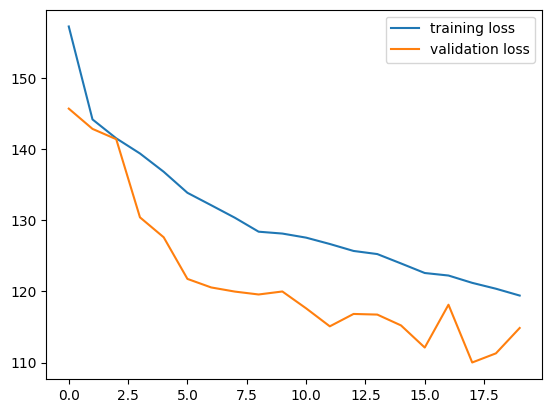

In [21]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

## Evaluating the model

Where does our model struggle to perform? We will examine some of the predictions found by the neural network, using this function that allows us to compute predictions and errors.

In [24]:
def model_summary(model):
  '''
  Function prints a small summary comparing predictions and actual values, and returns both.
  '''

  print('Model evaluated on test data: ')
  model.evaluate(X_test, y_test, verbose = 2)
  print('')

  preds = model.predict(X_test)
  preds = preds.flatten()
  print(f'\nPredictions: \n{preds[:20]}')

  actual = np.array(y_test)
  print(f'\nActual: \n{actual[:20]}')
  
  return (preds, actual)
  

Generally, our model performs very well, but it seems that it really struggles to predict the more expensive ticket prices.

In [25]:
preds, actual = model_summary(model)
error = preds - actual

Model evaluated on test data: 
991/991 - 2s - loss: 115.7833 - 2s/epoch - 2ms/step

991/991 [==============================] - 1s 1ms/step

Predictions: 
[358.02032 302.2499  602.8917  334.7989  340.50143 459.82397 366.94888
 519.72687 205.95583 367.27686 349.88654 340.6147  368.16223 331.7524
 487.7619  440.7665  167.29417 309.47714 367.95142 285.4464 ]

Actual: 
[397 283 626 229 480 564 469 515 337 649 501 274 403 679 587 509 146 220
 275 303]


Plotting the error, we see that most error falls between 200 and -400, but there are a notable amount of outliers in the -3000 range. These are most likely extremely expensive tickets that are so rare in our data set that the model struggles to accurately predict it. 

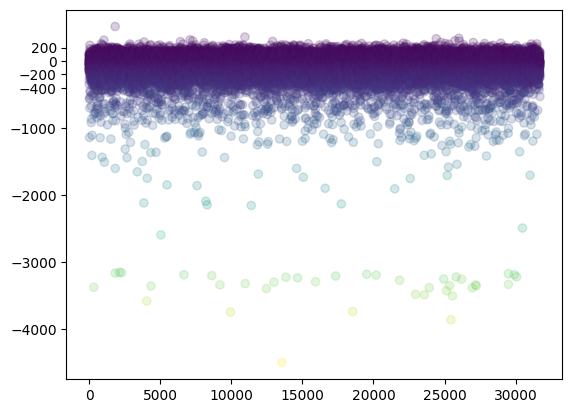

In [33]:
plt.scatter(np.arange(len(error)), 
            error, 
            c = actual, 
            alpha = .2, 
            cmap = 'viridis')
plt.yticks([200, 0, -200, -400, -1000, -2000, -3000, -4000])
plt.show()

This becomes clearer as we see there are an extremely small amount of ticket prices between \\$1000 and \\$2000, and even a maximum of $4683!

(array([1.12471e+05, 4.27140e+04, 2.51600e+03, 4.99000e+02, 1.00000e+02,
        3.30000e+01, 7.00000e+00, 1.45000e+02, 3.70000e+01, 2.00000e+00]),
 array([  41. ,  505.2,  969.4, 1433.6, 1897.8, 2362. , 2826.2, 3290.4,
        3754.6, 4218.8, 4683. ]),
 <BarContainer object of 10 artists>)

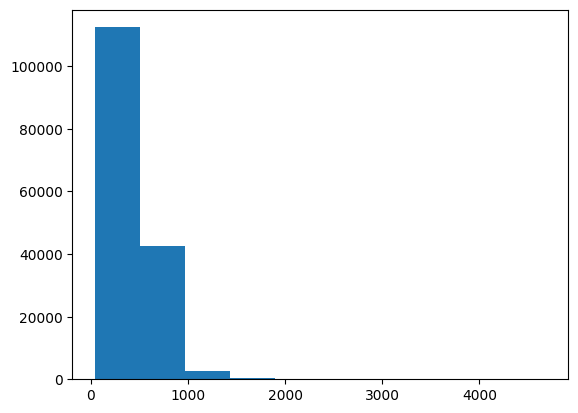

In [37]:
plt.hist(flights['Price'])

In [38]:
flights['Price'].min(), flights['Price'].max()

(41, 4683)